## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Get Files

In [2]:
# Data is available for download at https://data.ca.gov/dataset/covid-19-cases
files = [file for file in os.listdir('.\csv_files') if file.endswith('.csv')]
# Age Demographic vs Cases
age = pd.read_csv('.\csv_files\\' + files[0])
# Ethnicity Demographic vs Cases
ethnicity = pd.read_csv('.\csv_files\\' + files[1])
# Sex Demographic vs Cases
sex = pd.read_csv('.\csv_files\\' + files[2])
# Statewide Cases by County
state = pd.read_csv('.\csv_files\\' + files[3])

## Dataset 1: Find most deaths and case increases for the 4 months of the dataset

Text(0.6, 0.98, 'California Monthly New Deaths')

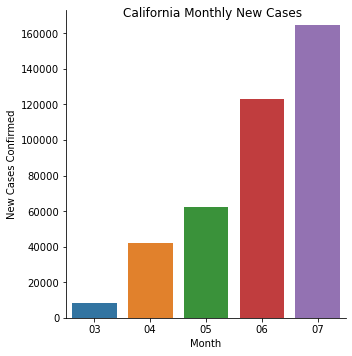

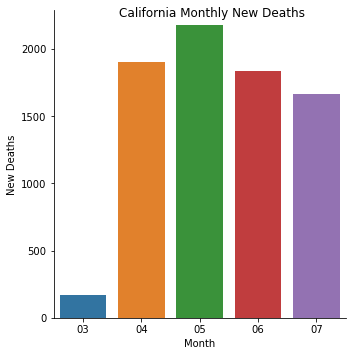

In [3]:
# Find the totals for California for each date
state_totals = state.groupby('date').sum()
state_totals.reset_index(inplace=True)
state_totals['month'] = state_totals['date'].str[5:7]
monthly_totals = state_totals.groupby('month').sum()
monthly_totals.reset_index(inplace=True)
#daily_totals = state_totals.groupby('date').sum()
#print(daily_totals.tail())
# Current data suggests that July will soon overtake June as most case increases so far
new_cases_plot = sns.catplot(x='month', y='newcountconfirmed', kind='bar', data=monthly_totals)
new_cases_plot.set_xlabels('Month')
new_cases_plot.set_ylabels('New Cases Confirmed')
new_cases_plot.fig.suptitle('California Monthly New Cases', x=0.6)

# May leads with the most deaths with July on route to overtake it
new_deaths_plot = sns.catplot(x='month', y='newcountdeaths', kind='bar', data=monthly_totals)
new_deaths_plot.set_xlabels('Month')
new_deaths_plot.set_ylabels('New Deaths')
new_deaths_plot.fig.suptitle('California Monthly New Deaths', x=0.6)



## Dataset 2: Ages Groups Compared

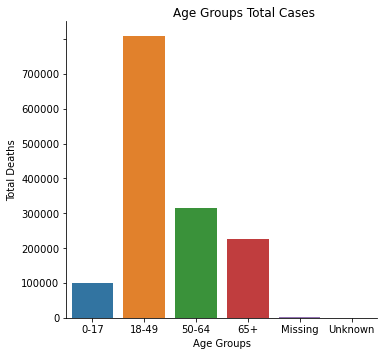

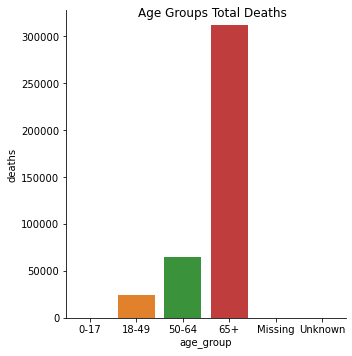

In [4]:
# This data isn't too helpful as the age range with the most
# cases also contains a majority of the ages.
# For some reason the data set has both '65 and older' and 65+,
# so we want to set them to be equal first before summing.
age['age_group'] = age['age_group'].str.replace('65 and Older', '65+')
age_totals = age.groupby('age_group').sum().reset_index()
#age_totals.drop(index=[4,5], inplace=True)
age_plot = sns.catplot(x='age_group', y='totalpositive', kind='bar', data=age_totals)
age_plot.fig.suptitle('Age Groups Total Cases', x=0.6)
age_plot.set_xlabels('Age Groups')
age_plot.set_ylabels('Total Positive Cases')
age_plot.set_yticklabels([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000])

# Strange enough there doesn't seem to be any deaths in the 0-17 age group
# The results definitely suggest elderly patients with Covid have a higher mortality rate
age_death = sns.catplot(x='age_group', y='deaths', kind='bar', data=age_totals)
age_death.fig.suptitle('Age Groups Total Deaths', x=0.6)
age_plot.set_xlabels('Age Groups')
age_plot.set_ylabels('Total Deaths')

## Dataset 3: Ethnicity variation

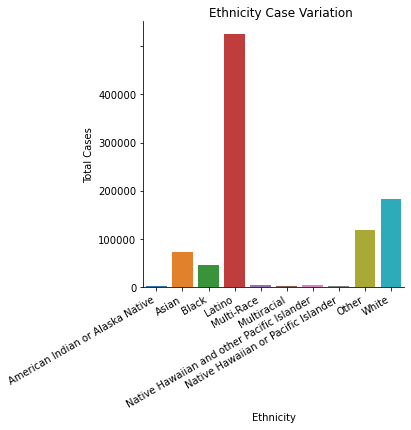

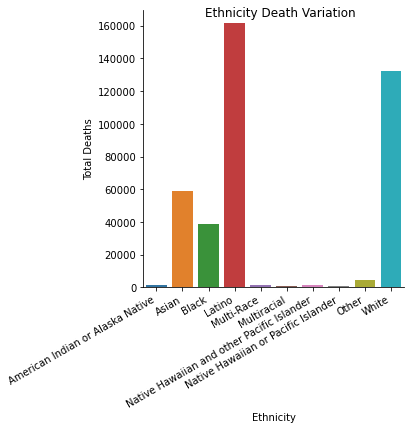

In [5]:
# The Latino community is greatly affected by the virus in comparison to all other
# ethnicities combined
eth_cases = ethnicity.groupby('race_ethnicity').sum().reset_index()
eth_cases_plot = sns.catplot(x='race_ethnicity', y='cases', kind='bar', data=eth_cases)
eth_cases_plot.fig.autofmt_xdate()
eth_cases_plot.fig.suptitle('Ethnicity Case Variation', x=0.6)
eth_cases_plot.set_xlabels('Ethnicity')
eth_cases_plot.set_ylabels('Total Cases')
eth_cases_plot.set_yticklabels([0, 100000, 200000, 300000, 400000])

# The Latino community is still the majority, but the white demographic also has deaths
# close to the levels of that of the Latino community.
eth_deaths_plot = sns.catplot(x='race_ethnicity', y='deaths', kind='bar', data=eth_cases)
eth_deaths_plot.fig.autofmt_xdate()
eth_deaths_plot.fig.suptitle('Ethnicity Death Variation', x=0.6)
eth_deaths_plot.set_xlabels('Ethnicity')
eth_deaths_plot.set_ylabels('Total Deaths')

## Dataset 4: Differences in Sex

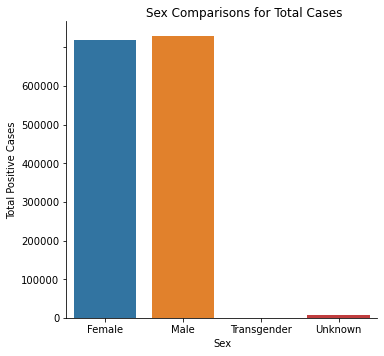

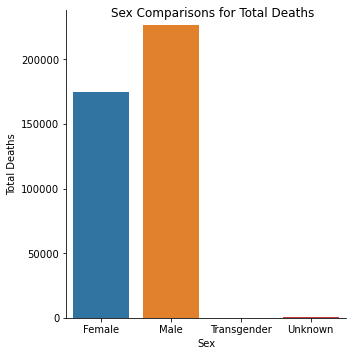

In [6]:
# Positive Cases between the sexes are about the same
sex_totals = sex.groupby('sex').sum().reset_index()
sex_cases_plot = sns.catplot(x='sex', y='totalpositive2', kind='bar', data=sex_totals)
sex_cases_plot.fig.suptitle('Sex Comparisons for Total Cases', x=0.6)
sex_cases_plot.set_xlabels('Sex')
sex_cases_plot.set_ylabels('Total Positive Cases')
sex_cases_plot.set_yticklabels([0, 100000, 200000, 300000, 400000, 500000, 600000])

# However, deaths are more skewed towards males
sex_death_plot = sns.catplot(x='sex', y='deaths', kind='bar', data=sex_totals)
sex_death_plot.fig.suptitle('Sex Comparisons for Total Deaths', x=0.6)
sex_death_plot.set_xlabels('Sex')
sex_death_plot.set_ylabels('Total Deaths')